
<h1><center><strong>Code for Evaluating the Performance of Terapixel rendering in Cloud (Super)computing</strong></center></h1>
        
</div>


<h2><center><strong>Importing Python Libraries 📕 📗 📘 📙</strong></center></
        
</div>

In [170]:

import pandas as pd
from array import *
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')






<div class="alert alert-block alert-info">  
<h2><center><strong>Loading the Data 📁 📂</strong></center></h2>
        
</div>

In [129]:
# Code to access data from drive

#from google.colab import drive
#!ls "/content/drive/My Drive/DATA"

#df_task = pd.read_csv("/content/drive/My Drive/DATA/task-x-y.csv",sep=",",on_bad_lines='skip') 
#df_app_chk = pd.read_csv("/content/drive/My Drive/DATA/application-checkpoints.csv",sep=",",on_bad_lines='skip') 
#df_gpu = pd.read_csv("/content/drive/My Drive/DATA/gpu.csv",sep=",",on_bad_lines='skip') 


#Accessing data From local drive

df_app_chk=pd.read_csv('C:/Users/sivam/Downloads/application-checkpoints.csv')
df_task=pd.read_csv('C:/Users/sivam/Downloads/task-x-y.csv')
df_gpu=pd.read_csv('C:/Users/sivam/Downloads/gpu.csv')

<div class="alert alert-block alert-info">  
<h2><center><strong>Basic Analysis 🔎</strong></center></h2>
        
</div>

In [130]:
# Display the Number of rows and columns in data using shape
print("Dimenions of application-checkpoint.csv : ", df_app_chk.shape)
print("Dimenions of gpu.csv : ", df_gpu.shape)
print("Dimenions of task-x-y.csv : ", df_task.shape)

Dimenions of application-checkpoint.csv :  (660400, 6)
Dimenions of gpu.csv :  (1543681, 8)
Dimenions of task-x-y.csv :  (65793, 5)


### 5 top records of data

In [131]:
# Display the first 5 rows of application checkpoints data

df_app_chk.head(5)

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d


In [132]:
# Display the first 5 rows of gpu data

df_gpu.head(5)

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [133]:
# Display the first 5 rows of task data

df_task.head(5)

,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


### Columns list with datatype

In [134]:
# Display the columns of each dataframes with datatypes
print("---APPLICATION CHECKPOINTS ---")
print(df_app_chk.dtypes)
print("-------------GPU-------------")
print(df_gpu.dtypes)
print("-----------TASK- X- Y----------")
print(df_task.dtypes)

---APPLICATION CHECKPOINTS ---
timestamp    object
hostname     object
eventName    object
eventType    object
jobId        object
taskId       object
dtype: object
-------------GPU-------------
timestamp          object
hostname           object
gpuSerial           int64
gpuUUID            object
powerDrawWatt     float64
gpuTempC            int64
gpuUtilPerc         int64
gpuMemUtilPerc      int64
dtype: object
-----------TASK- X- Y----------
taskId    object
jobId     object
x          int64
y          int64
level      int64
dtype: object


### Checking Null values

In [135]:
# Check for null values in the dataframes.
print("---APPLICATION CHECKPOINTS ---")
print(df_app_chk.isnull().sum())
print("-------------GPU-------------")
print(df_gpu.isnull().sum())
print("-----------TASK- X- Y----------")
print(df_task.isnull().sum())

---APPLICATION CHECKPOINTS ---
timestamp    0
hostname     0
eventName    0
eventType    0
jobId        0
taskId       0
dtype: int64
-------------GPU-------------
timestamp         0
hostname          0
gpuSerial         0
gpuUUID           0
powerDrawWatt     0
gpuTempC          0
gpuUtilPerc       0
gpuMemUtilPerc    0
dtype: int64
-----------TASK- X- Y----------
taskId    0
jobId     0
x         0
y         0
level     0
dtype: int64


### Checking duplicate data

In [136]:
df_app_chk.duplicated().sum()

2470

In [137]:
df_gpu.duplicated().sum()

9

In [138]:
df_task.duplicated().sum()

0

<div class="alert alert-block alert-info">  
<h1><center><strong>Data cleaning and preparation 💡</strong></center></h1>

   
        
</div>

### Dropping duplicate data

In [139]:
#dropping duplicates
df_app_chk = df_app_chk.drop_duplicates()
df_gpu = df_gpu.drop_duplicates()
df_task = df_task.drop_duplicates()

### Changing data types as per our analysis requirement

In [140]:
# Change the datatype of  column timestamp from object to tiimestamp

df_app_chk["timestamp"] = df_app_chk["timestamp"].apply(lambda x: pd.Timestamp(x))
df_gpu["timestamp"] = df_gpu["timestamp"].apply(lambda x: pd.Timestamp(x))

# changing datatype of gpuserial to string

df_gpu["gpuSerial"] = df_gpu["gpuSerial"].apply(lambda x: str(x))

In [141]:
# Display the columns of each dataframes with datatypes
print("---APPLICATION CHECKPOINTS ---")
print(df_app_chk.dtypes)
print("-------------GPU-------------")
print(df_gpu.dtypes)
print("-----------TASK- X- Y----------")
print(df_task.dtypes)

---APPLICATION CHECKPOINTS ---
timestamp    datetime64[ns, UTC]
hostname                  object
eventName                 object
eventType                 object
jobId                     object
taskId                    object
dtype: object
-------------GPU-------------
timestamp         datetime64[ns, UTC]
hostname                       object
gpuSerial                      object
gpuUUID                        object
powerDrawWatt                 float64
gpuTempC                        int64
gpuUtilPerc                     int64
gpuMemUtilPerc                  int64
dtype: object
-----------TASK- X- Y----------
taskId    object
jobId     object
x          int64
y          int64
level      int64
dtype: object


<div class="alert alert-block alert-info">  
<h1><center><strong>Data Transformation</strong></center></h1>
</div>


### Transforming data and Creating tables for our Analysis


In [142]:
# merging to find start and stop time in a separate column for different eventtype and the process time is calculated substracting the start and start time and changing it to seconds


df_app_chk_perf = pd.merge(df_app_chk.loc[df_app_chk["eventType"] == "START"], df_app_chk.loc[df_app_chk["eventType"] == "STOP"],  how='left', on=['hostname','eventName','jobId','taskId'],
                         suffixes=('_start', '_stop'))

df_app_chk_perf = df_app_chk_perf.drop(columns=["eventType_start","eventType_stop"])
df_app_chk_perf["process_time"] = df_app_chk_perf["timestamp_stop"] - df_app_chk_perf["timestamp_start"]
df_app_chk_perf["process_time"] = df_app_chk_perf['process_time'].dt.total_seconds()

df_app_chk_perf.sort_values(by=["hostname","timestamp_start"], inplace=True)


In [143]:
df_app_chk_perf

,timestamp_start,hostname,eventName,jobId,taskId,timestamp_stop,process_time
709,2018-11-08 07:41:45.459000+00:00,04dc4e9647154250beeee51b866b0715000000,TotalRender,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:42:11.268000+00:00,25.809
710,2018-11-08 07:41:45.459000+00:00,04dc4e9647154250beeee51b866b0715000000,Saving Config,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:41:45.461000+00:00,0.002
84646,2018-11-08 07:41:45.461000+00:00,04dc4e9647154250beeee51b866b0715000000,Render,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:42:09.344000+00:00,23.883
84715,2018-11-08 07:42:09.344000+00:00,04dc4e9647154250beeee51b866b0715000000,Uploading,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:42:11.268000+00:00,1.924
216925,2018-11-08 07:42:09.351000+00:00,04dc4e9647154250beeee51b866b0715000000,Tiling,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:42:10.074000+00:00,0.723
...,...,...,...,...,...,...,...
142123,2018-11-08 08:28:38.011000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Saving Config,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,61250373-df16-43fd-a2aa-a542993385e1,2018-11-08 08:28:38.013000+00:00,0.002
327568,2018-11-08 08:28:38.011000+00:00,e7adc42d28814e518e9601ac2329c51300001D,TotalRender,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,61250373-df16-43fd-a2aa-a542993385e1,2018-11-08 08:29:29.209000+00:00,51.198
39014,2018-11-08 08:28:38.013000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Render,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,61250373-df16-43fd-a2aa-a542993385e1,2018-11-08 08:29:28.314000+00:00,50.301
255396,2018-11-08 08:29:28.314000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Uploading,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,61250373-df16-43fd-a2aa-a542993385e1,2018-11-08 08:29:29.209000+00:00,0.895


In [144]:
df_app_chk_perf_no_tr = df_app_chk_perf[df_app_chk_perf['eventName'] != "TotalRender"] 
df_app_chk_perf_no_tr_grp = df_app_chk_perf_no_tr.groupby(by=['taskId'], as_index=True).sum()#calculating process type for all events except TotalRender
df_app_chk_perf_tr = df_app_chk_perf[df_app_chk_perf['eventName'] == "TotalRender"]
df_app_chk_perf_tr_grp = df_app_chk_perf_tr.groupby(by=['taskId'], as_index=True).sum()
df_app_chk_perf_merg = pd.merge(df_app_chk_perf_no_tr_grp,df_app_chk_perf_tr_grp,  how='left', on=['taskId'],suffixes=("_sum_of_all_tasks","_totalrender"))




In [194]:
df_app_chk_perf_no_tr

,timestamp_start,hostname,eventName,jobId,taskId,timestamp_stop,process_time
710,2018-11-08 07:41:45.459000+00:00,04dc4e9647154250beeee51b866b0715000000,Saving Config,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:41:45.461000+00:00,0.002
84646,2018-11-08 07:41:45.461000+00:00,04dc4e9647154250beeee51b866b0715000000,Render,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:42:09.344000+00:00,23.883
84715,2018-11-08 07:42:09.344000+00:00,04dc4e9647154250beeee51b866b0715000000,Uploading,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:42:11.268000+00:00,1.924
216925,2018-11-08 07:42:09.351000+00:00,04dc4e9647154250beeee51b866b0715000000,Tiling,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:42:10.074000+00:00,0.723
217118,2018-11-08 07:42:14.797000+00:00,04dc4e9647154250beeee51b866b0715000000,Saving Config,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,dbc599f6-694b-46c4-a864-e09ab881af37,2018-11-08 07:42:14.800000+00:00,0.003
...,...,...,...,...,...,...,...
257457,2018-11-08 08:28:33.552000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Tiling,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,7898c36a-1c41-442e-826d-b8884880dc2a,2018-11-08 08:28:34.521000+00:00,0.969
142123,2018-11-08 08:28:38.011000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Saving Config,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,61250373-df16-43fd-a2aa-a542993385e1,2018-11-08 08:28:38.013000+00:00,0.002
39014,2018-11-08 08:28:38.013000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Render,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,61250373-df16-43fd-a2aa-a542993385e1,2018-11-08 08:29:28.314000+00:00,50.301
255396,2018-11-08 08:29:28.314000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Uploading,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,61250373-df16-43fd-a2aa-a542993385e1,2018-11-08 08:29:29.209000+00:00,0.895




*   calculating process type for all events except TotalRender and summing it by grouping by taskid and created data frame df_app_chk_perf_no_tr_grp from df_app_chk_perf dataframe, with only task id and process time for the respective taskid.
*   calculating process type for event TotalRender and summing it by grouping by taskid and created data frame df_app_chk_perf_tr from df_app_chk_perf dataframe, with only task id and process time for the respective taskid.


*   Created df_app_chk_perf_merg data frame merging df_app_chk_perf_no_tr_grp and df_app_chk_perf_tr_grp dataframe ,merged with their respective task id  , the dataframe has three columns : taskid , process_time_sum_of_all_tasks (calculated by summing), process_time_totalrender.










In [145]:
df_app_chk_perf_no_tr_grp

,process_time
taskId,
00004e77-304c-4fbd-88a1-1346ef947567,32.380
0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,41.723
0003c380-4db9-49fb-8e1c-6f8ae466ad85,32.843
000993b6-fc88-489d-a4ca-0a44fd800bd3,41.148
000b158b-0ba3-4dca-bf5b-1b3bd5c28207,34.546
...,...
fffa5992-d9cc-473e-b24b-09c404c6e906,41.589
fffc3c9b-4c73-445d-98f6-0ea7d723a456,43.355
fffc979a-8424-405a-b51c-80bc6f07019d,45.141


In [146]:
df_app_chk_perf_tr_grp

,process_time
taskId,
00004e77-304c-4fbd-88a1-1346ef947567,31.405
0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,40.730
0003c380-4db9-49fb-8e1c-6f8ae466ad85,31.899
000993b6-fc88-489d-a4ca-0a44fd800bd3,40.138
000b158b-0ba3-4dca-bf5b-1b3bd5c28207,33.693
...,...
fffa5992-d9cc-473e-b24b-09c404c6e906,40.590
fffc3c9b-4c73-445d-98f6-0ea7d723a456,42.355
fffc979a-8424-405a-b51c-80bc6f07019d,44.209


In [147]:
df_app_chk_perf_merg

,process_time_sum_of_all_tasks,process_time_totalrender
taskId,,
00004e77-304c-4fbd-88a1-1346ef947567,32.380,31.405
0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,41.723,40.730
0003c380-4db9-49fb-8e1c-6f8ae466ad85,32.843,31.899
000993b6-fc88-489d-a4ca-0a44fd800bd3,41.148,40.138
000b158b-0ba3-4dca-bf5b-1b3bd5c28207,34.546,33.693
...,...,...
fffa5992-d9cc-473e-b24b-09c404c6e906,41.589,40.590
fffc3c9b-4c73-445d-98f6-0ea7d723a456,43.355,42.355
fffc979a-8424-405a-b51c-80bc6f07019d,45.141,44.209


In [148]:
#Calculating host performance mean
host_performance =df_app_chk_perf[df_app_chk_perf['eventName'] == "TotalRender"]
host_performance =host_performance.groupby(by=['hostname'], as_index=True).mean()
host_performance

,process_time
hostname,
04dc4e9647154250beeee51b866b0715000000,44.350328
04dc4e9647154250beeee51b866b0715000001,45.698050
04dc4e9647154250beeee51b866b0715000002,40.275418
04dc4e9647154250beeee51b866b0715000003,40.822985
04dc4e9647154250beeee51b866b0715000004,45.969167
...,...
e7adc42d28814e518e9601ac2329c513000019,45.212000
e7adc42d28814e518e9601ac2329c51300001A,40.272309
e7adc42d28814e518e9601ac2329c51300001B,45.223820


Created host_performance dataframe from df_app_chk_perf by grouping the hostname coumn and calculating the mean of the processtime.This dataframe contains the mean of the processtime for every hostname

In [149]:
#Calculating host performance sum
host_performance_sum =df_app_chk_perf[df_app_chk_perf['eventName'] == "TotalRender"]
host_performance_sum =host_performance_sum.groupby(by=['hostname'], as_index=True).sum()
host_performance_sum

,process_time
hostname,
04dc4e9647154250beeee51b866b0715000000,2705.370
04dc4e9647154250beeee51b866b0715000001,2741.883
04dc4e9647154250beeee51b866b0715000002,2698.453
04dc4e9647154250beeee51b866b0715000003,2694.317
04dc4e9647154250beeee51b866b0715000004,2758.150
...,...
e7adc42d28814e518e9601ac2329c513000019,2757.932
e7adc42d28814e518e9601ac2329c51300001A,2738.517
e7adc42d28814e518e9601ac2329c51300001B,2758.653


In [150]:
#Calculating gpu computations for hosts and process time by combining host perf and gpu
gpu_performance = df_gpu[["hostname","gpuUUID","gpuSerial","powerDrawWatt","gpuTempC","gpuUtilPerc","gpuMemUtilPerc"]].groupby(by=["hostname","gpuUUID","gpuSerial"], as_index=False).mean()
host_gpu_perf = pd.merge(host_performance,gpu_performance,on='hostname')
host_gpu_perf = host_gpu_perf.sort_values(by="process_time",ascending=False)

In [151]:
host_gpu_perf

,hostname,process_time,gpuUUID,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
952,dcc19f48bb3445a28338db3a8f002e9c00000S,47.038776,GPU-343f3127-be6d-7616-915b-9a49e3cc8e6a,323617042821,94.481619,45.484344,64.770819,36.563624
147,0d56a730076643d585f77e00d2d8521a00001B,47.013441,GPU-890ec602-df24-ca45-1b70-8955d57835ae,325017018645,94.302272,38.357761,66.564290,38.231179
987,e7adc42d28814e518e9601ac2329c51300000D,46.993169,GPU-cb968e6f-f7d6-28c5-4989-f3267ec01b05,320218055378,92.716029,39.785476,66.232512,38.025316
154,265232c5f6814768aeefa66a7bec6ff6000004,46.853237,GPU-12dab754-c029-fcdc-c170-4e31bc00a961,323217048793,91.849053,41.579333,64.598000,36.294000
304,4a79b6d2616049edbf06c6aa58ab426a00000U,46.833712,GPU-c8ccb10d-f3a8-bbe9-ce32-f05069144767,320118118728,95.704273,39.560000,65.470000,36.858667
...,...,...,...,...,...,...,...,...
872,d8241877cd994572b46c861e5d144c8500001C,39.050686,GPU-ea11c851-c572-00cb-35dc-43076715b198,323617020369,91.391805,42.850766,60.499667,30.145237
715,a77ef58b13ad4c01b769dac8409af3f8000015,39.022057,GPU-a5bb9a92-9e35-f9e6-e7b0-81b9d966e243,323617042519,91.575676,40.920053,62.261825,31.219187
273,35bd84d72aca403b8129a7d652cc275000000N,38.824471,GPU-045092d0-5454-f3a1-0fc8-05b5b0aa6832,323617021127,81.740207,39.572285,60.932712,29.860093
182,265232c5f6814768aeefa66a7bec6ff600000W,38.667857,GPU-c85124c3-ba5a-043f-1797-8b6568c41003,323617020438,81.400200,38.646862,59.859813,28.954606


In [152]:
#Calculating processing time for each tile
task_xy_performance =  pd.merge(df_task,df_app_chk_perf_no_tr_grp,on='taskId')
task_xy_performance = task_xy_performance.drop(columns=['taskId','jobId'])
task_xy_performance.sort_values(by=['x','y'], inplace=True)
task_xy_performance

,x,y,level,process_time
55836,0,0,12,25.336
65536,0,0,4,53.428
65787,0,0,8,44.601
56494,0,1,12,43.979
65603,0,1,8,25.552
...,...,...,...,...
56706,255,251,12,53.228
51730,255,252,12,45.252
25742,255,253,12,44.069
4723,255,254,12,57.269


In [153]:
#creating different datasets for different levels

task_lvl_12 = task_xy_performance[task_xy_performance['level'] == 12]
task_lvl_8 = task_xy_performance[task_xy_performance['level'] == 8]
task_lvl_4 = task_xy_performance[task_xy_performance['level'] == 4]

   level      x      y  process_time
0      4    0.0    0.0     53.428000
1      8    7.5    7.5     49.478262
2     12  127.5  127.5     43.554344


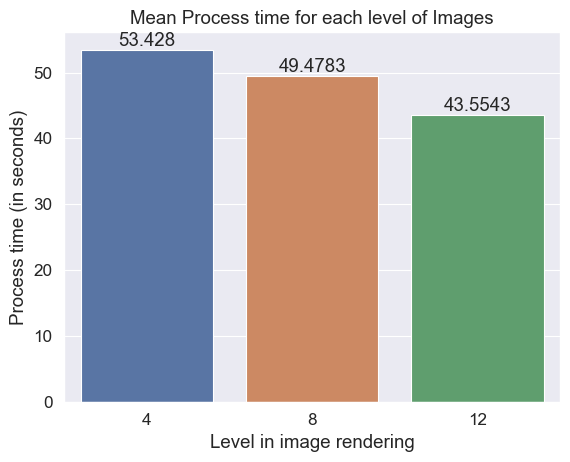

In [176]:
task_lvl_mean = task_xy_performance.groupby(by=["level"], as_index=False).mean()
print(task_lvl_mean)

ax = sns.barplot(x='level', y='process_time',
                 data=task_lvl_mean,
                 errwidth=0)
 
ax.set_title("Mean Process time for each level of Images")

ax.bar_label(ax.containers[0])
ax.set_ylabel("Process time (in seconds)")
ax.set_xlabel("Level in image rendering")
plt.show()



<div class="alert alert-block alert-info">  
<h2><center><strong>EXPLORATORY DATA ANALYSIS 🔎</strong></center></h2>
        
</div>

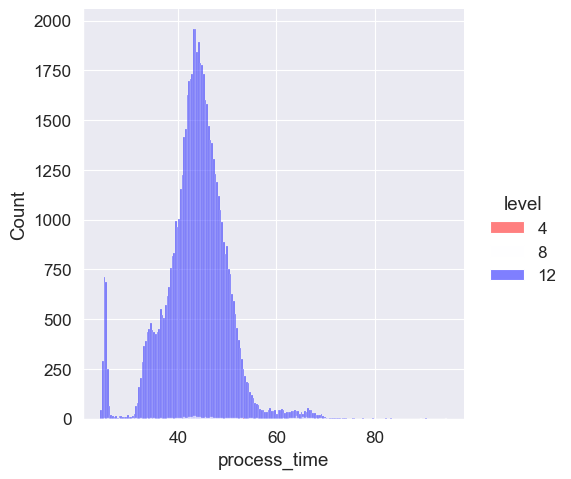

In [155]:
sns.displot(data=task_xy_performance, x="process_time", hue="level",palette='bwr_r')
plt.show()

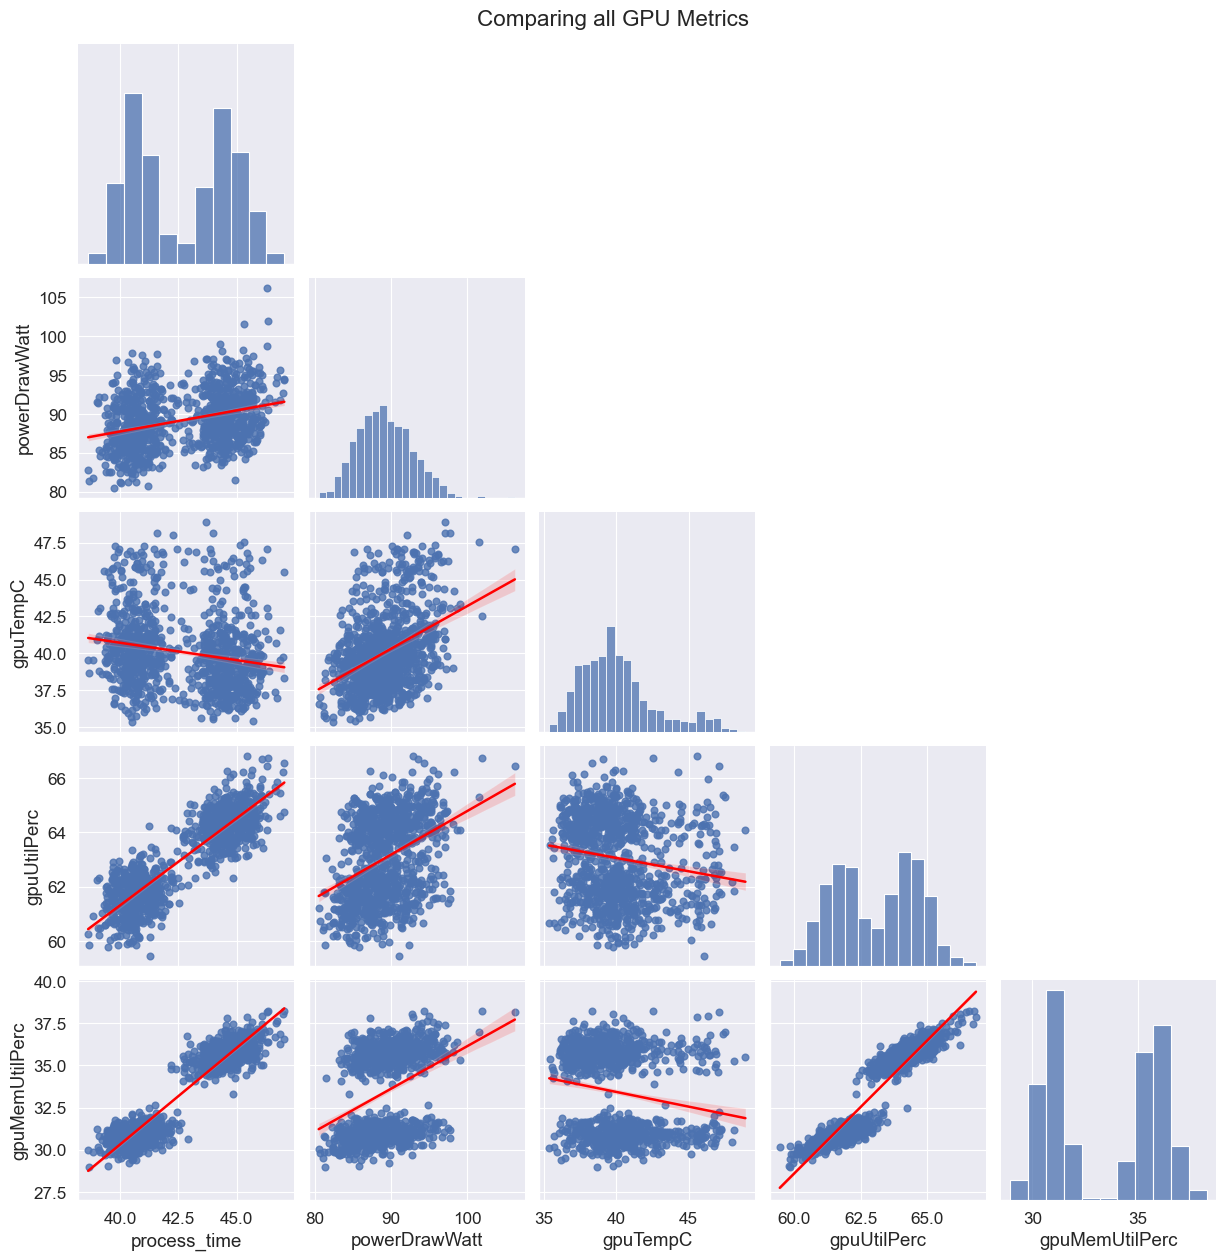

In [175]:
ax = sns.pairplot(host_gpu_perf, kind="reg",corner=True, plot_kws={'line_kws':{'color':'red'}})
ax.fig.suptitle("Comparing all GPU Metrics", y=1.01)
plt.show()

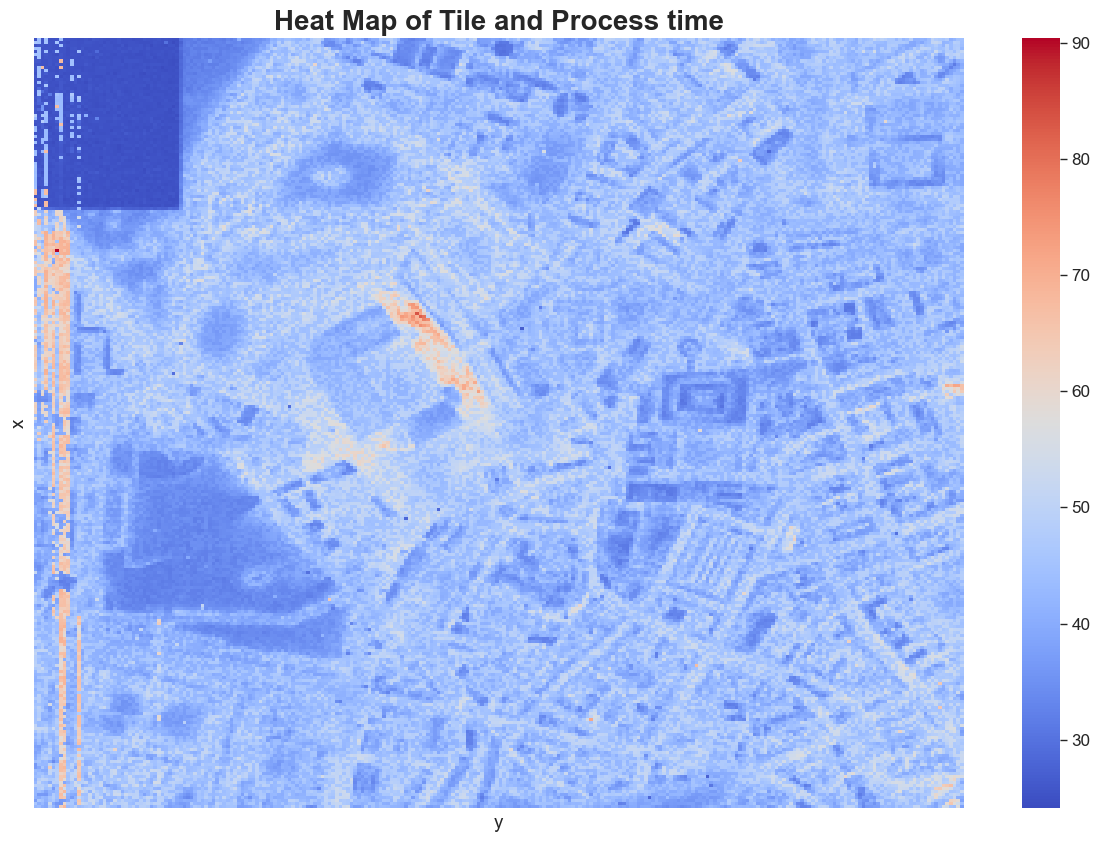

In [157]:
#Heat map to show process time for each tile.

sns.set(font_scale=0.8)
sns.set_context('paper', font_scale=1.4)
fig, ax = plt.subplots(figsize=(15,10))
glue = task_lvl12[["x","y","process_time"]].pivot("x", "y", "process_time")
ax = sns.heatmap(glue, cmap='coolwarm', annot=False, xticklabels=False, yticklabels=False)
ax.tick_params()

# characteristics of the visual of the heatmap
plt.title("Heat Map of Tile and Process time", size=20,fontweight='bold' )
plt.show()

In [158]:
df_app_chk_perf

,timestamp_start,hostname,eventName,jobId,taskId,timestamp_stop,process_time
709,2018-11-08 07:41:45.459000+00:00,04dc4e9647154250beeee51b866b0715000000,TotalRender,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:42:11.268000+00:00,25.809
710,2018-11-08 07:41:45.459000+00:00,04dc4e9647154250beeee51b866b0715000000,Saving Config,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:41:45.461000+00:00,0.002
84646,2018-11-08 07:41:45.461000+00:00,04dc4e9647154250beeee51b866b0715000000,Render,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:42:09.344000+00:00,23.883
84715,2018-11-08 07:42:09.344000+00:00,04dc4e9647154250beeee51b866b0715000000,Uploading,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:42:11.268000+00:00,1.924
216925,2018-11-08 07:42:09.351000+00:00,04dc4e9647154250beeee51b866b0715000000,Tiling,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:42:10.074000+00:00,0.723
...,...,...,...,...,...,...,...
142123,2018-11-08 08:28:38.011000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Saving Config,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,61250373-df16-43fd-a2aa-a542993385e1,2018-11-08 08:28:38.013000+00:00,0.002
327568,2018-11-08 08:28:38.011000+00:00,e7adc42d28814e518e9601ac2329c51300001D,TotalRender,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,61250373-df16-43fd-a2aa-a542993385e1,2018-11-08 08:29:29.209000+00:00,51.198
39014,2018-11-08 08:28:38.013000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Render,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,61250373-df16-43fd-a2aa-a542993385e1,2018-11-08 08:29:28.314000+00:00,50.301
255396,2018-11-08 08:29:28.314000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Uploading,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,61250373-df16-43fd-a2aa-a542993385e1,2018-11-08 08:29:29.209000+00:00,0.895


# Exploring and Analysing of Business Objective

### Which event types dominate task runtimes?

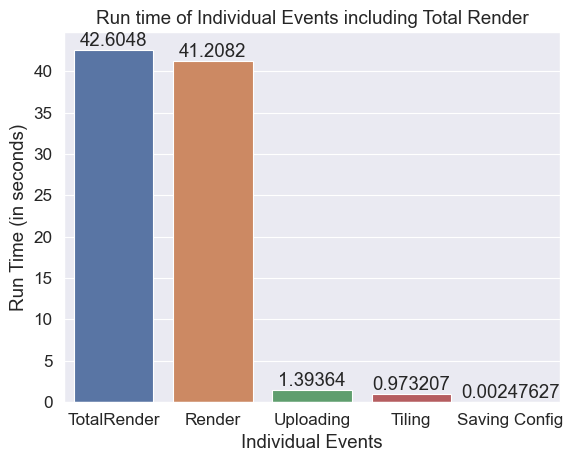

In [184]:
#Which event types dominate task runtimes?

event_process_time = df_app_chk_perf[["eventName","process_time"]].groupby(by="eventName", as_index=False).mean()
event_process_time.sort_values(by="process_time", ascending=False, inplace=True)
event_process_time

ax = sns.barplot(x='eventName', y='process_time',
                 data=event_process_time,
                 errwidth=0)
 
ax.set_title("Run time of Individual Events including Total Render")

ax.bar_label(ax.containers[0])
ax.set_ylabel("Run Time (in seconds)")
ax.set_xlabel("Individual Events")
plt.show()



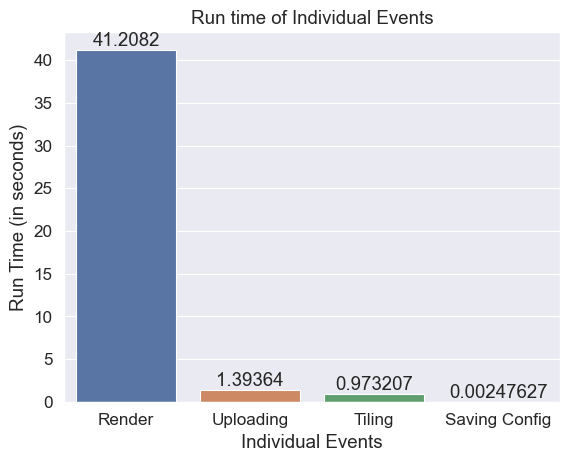

In [183]:
event_process_time = df_app_chk_perf_no_tr[["eventName","process_time"]].groupby(by="eventName", as_index=False).mean()
event_process_time.sort_values(by="process_time", ascending=False, inplace=True)
event_process_time

ax = sns.barplot(x='eventName', y='process_time',
                 data=event_process_time,
                 errwidth=0)
 
ax.set_title("Run time of Individual Events")

ax.bar_label(ax.containers[0])
ax.set_ylabel("Run Time (in seconds)")
ax.set_xlabel("Individual Events")
plt.show()

### What is the interplay between GPU temperature and performance?

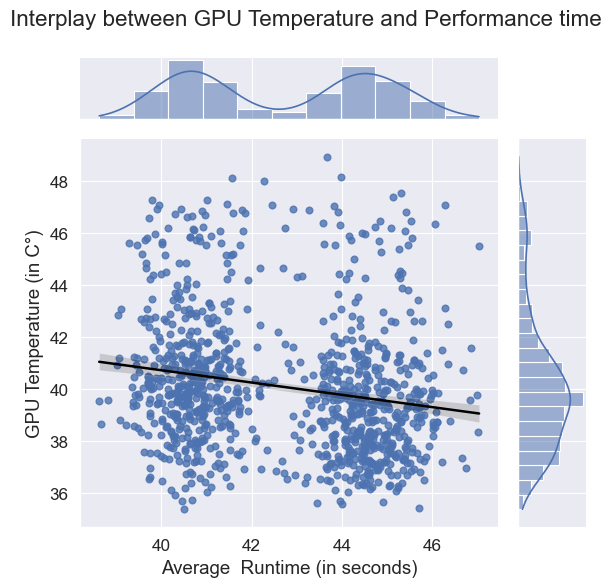

In [190]:
#What is the interplay between GPU temperature and performance?

ax = sns.jointplot(x='process_time', y='gpuTempC', data=host_gpu_perf, kind='reg',joint_kws={'line_kws':{'color':'black'}})
ax.fig.suptitle("Interplay between GPU Temperature and Performance time")
ax.ax_joint.set_xlabel('Average  Runtime (in seconds)')
ax.ax_joint.set_ylabel('GPU Temperature (in C°)')
ax.fig.tight_layout()


In [187]:
#What is the interplay between increased power draw and render time?
render = df_app_chk_perf[df_app_chk_perf['eventName'] == "Render"]
render_time = render.groupby(by=['hostname'], as_index=True).mean()
power = df_gpu[['hostname','powerDrawWatt']]
power = power.groupby(by=['hostname'], as_index=True).mean()
rend_pwr =  pd.merge(render_time,power,on='hostname')
rend_pwr


,process_time,powerDrawWatt
hostname,,
04dc4e9647154250beeee51b866b0715000000,43.285934,95.868947
04dc4e9647154250beeee51b866b0715000001,44.329300,91.813693
04dc4e9647154250beeee51b866b0715000002,39.218612,82.537798
04dc4e9647154250beeee51b866b0715000003,39.111136,86.558581
04dc4e9647154250beeee51b866b0715000004,44.265833,94.292392
...,...,...
e7adc42d28814e518e9601ac2329c513000019,43.511443,89.386562
e7adc42d28814e518e9601ac2329c51300001A,38.901250,82.943504
e7adc42d28814e518e9601ac2329c51300001B,43.537377,88.354997


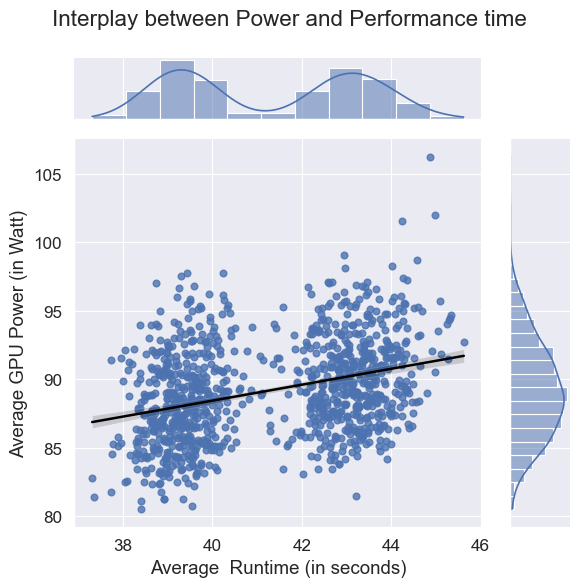

In [191]:
#plotting the plot
ax = sns.jointplot(x='process_time', y='powerDrawWatt', data=rend_pwr, kind='reg',joint_kws={'line_kws':{'color':'black'}})
ax.fig.suptitle("Interplay between Power and Performance time")
ax.ax_joint.set_xlabel('Average  Runtime (in seconds)')
ax.ax_joint.set_ylabel('Average GPU Power (in Watt)')
ax.fig.tight_layout()


In [203]:
#Can we quantify the variation in computation requirements for particular tiles?
df_app_chk_perf_no_tr_group_all = df_app_chk_perf_no_tr.groupby(by=['hostname','taskId'], as_index=False).sum()#calculating process type for all events except TotalRender
merged =  pd.merge(df_task[['taskId','x','y','level']],df_app_chk_perf_no_tr_group_all[['hostname','taskId','process_time']],on='taskId')
merged.sort_values(by=['x','y'], inplace=True)
gpu_fil = df_gpu[["hostname","powerDrawWatt","gpuTempC","gpuUtilPerc","gpuMemUtilPerc"]].groupby(by=["hostname"], as_index=False).mean()
merg_tile_gpu = pd.merge(gpu_fil,merged, on='hostname', how='right',
   validate='one_to_many')

merg_tile_gpu_4 = merg_tile_gpu[merg_tile_gpu['level'] == 4]
merg_tile_gpu_8 = merg_tile_gpu[merg_tile_gpu['level'] == 8]
merg_tile_gpu_12 = merg_tile_gpu[merg_tile_gpu['level'] == 12]

merg_tile_gpu_12

,hostname,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,taskId,x,y,level,process_time
0,83ea61ac1ef54f27a3bf7bd0f41ecaa7000001,92.993187,46.725333,61.135333,30.232667,d9d4da27-5478-44a5-928a-ded80a5b7844,0,0,12,25.336
3,04dc4e9647154250beeee51b866b071500000G,90.424421,39.926099,64.677763,35.939414,dc676d2f-20e6-4af2-a3ef-a518e9412591,0,1,12,43.979
5,db871cd77a544e13bc791a64a0c8ed5000000P,85.524200,38.590667,61.101333,30.066000,16cf73b6-63d4-4dc2-ad68-f85ac006c521,0,2,12,25.138
7,cd44f5819eba427a816e7ce648adceb200000B,83.273718,39.034644,60.636243,29.680879,547b45b3-f045-41e8-be20-1e38d2663316,0,3,12,45.179
9,0d56a730076643d585f77e00d2d8521a00000B,85.604693,36.132667,62.278000,31.493333,c6ab6b21-3703-4d26-a18a-6edf323ebec6,0,4,12,24.795
...,...,...,...,...,...,...,...,...,...,...
65788,0745914f4de046078517041d70b22fe700000H,87.251407,37.551333,62.198667,31.439333,dd5420fa-21c8-48f1-a4d3-138fbf20a2f8,255,251,12,53.228
65789,4ad946d4435c42dabb5073531ea4f31500000O,87.608961,37.980680,64.702865,36.292472,c9e2cdf1-f1e1-48ea-b5f2-82b98203c846,255,252,12,45.252
65790,0745914f4de046078517041d70b22fe700000K,84.464657,40.128581,61.918721,30.423718,641f6680-a986-46ef-b81a-5e6f7b4506b1,255,253,12,44.069
65791,b9a1fa7ae2f74eb68f25f607980f97d700000K,88.462973,41.097333,63.798000,34.858667,128302e3-2113-4b0e-8862-07cb2e95d4d1,255,254,12,57.269


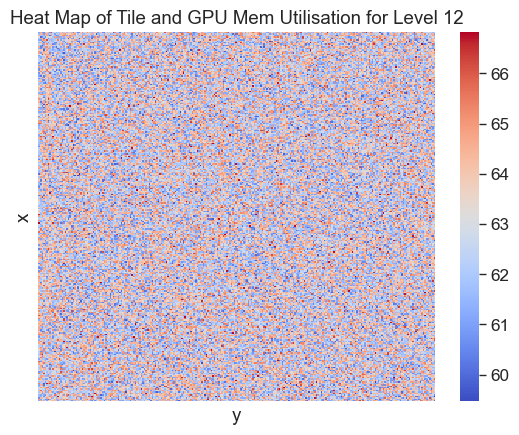

In [210]:
#Heat Map of Tile and GPU Mem Utilisation for Level 12
glue1 = merg_tile_gpu_12[["x","y","gpuUtilPerc"]].pivot("x", "y", "gpuUtilPerc")
glue2 = merg_tile_gpu_8[["x","y","gpuUtilPerc"]].pivot("x", "y", "gpuUtilPerc")
glue3 = merg_tile_gpu_4[["x","y","gpuUtilPerc"]].pivot("x", "y", "gpuUtilPerc")
fig, (ax1) = plt.subplots(ncols=1)
fig.subplots_adjust(wspace=0.01)
ax1.set_title('Heat Map of Tile and GPU Mem Utilisation for Level 12')

sns.heatmap(glue1,cmap='coolwarm',  annot=False, xticklabels=False, yticklabels=False, ax=ax1)


plt.show()



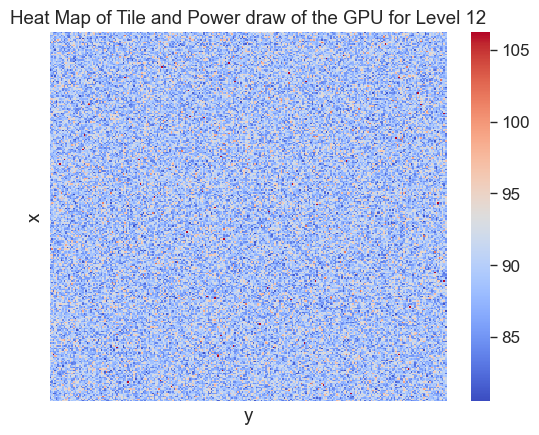

In [211]:
#Heat Map of Tile and GPU Mem Utilisation for Level 12
glue1 = merg_tile_gpu_12[["x","y","powerDrawWatt"]].pivot("x", "y", "powerDrawWatt")
glue2 = merg_tile_gpu_8[["x","y","powerDrawWatt"]].pivot("x", "y", "powerDrawWatt")
glue3 = merg_tile_gpu_4[["x","y","powerDrawWatt"]].pivot("x", "y", "powerDrawWatt")
fig, (ax1) = plt.subplots(ncols=1)
fig.subplots_adjust(wspace=0.01)
ax1.set_title('Heat Map of Tile and Power draw of the GPU for Level 12')

sns.heatmap(glue1,cmap='coolwarm',  annot=False, xticklabels=False, yticklabels=False, ax=ax1)


plt.show()

        gpuSerial  process_time
952  323617042821     47.038776
147  325017018645     47.013441
987  320218055378     46.993169
154  323217048793     46.853237
304  320118118728     46.833712
320  320218055639     46.743966
633  320118119009     46.675814
310  325117172889     46.660000
984  320118118802     46.399695
901  323617021137     46.350881


<Figure size 640x480 with 0 Axes>

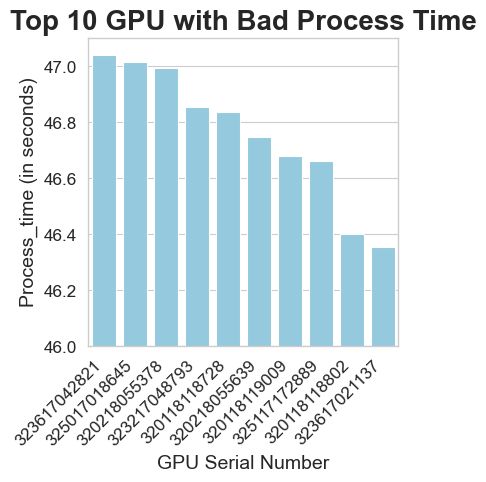

In [258]:
#Can we identify particular GPU cards (based on their serial numbers) whose performance differs to other cards? (i.e. perpetually slow cards).
perf_plot = host_gpu_perf[['gpuSerial','process_time']]
perf_plot.sort_values(by='process_time',ascending=False,inplace=True)
perf_plot["gpuSerial"] = perf_plot["gpuSerial"].apply(lambda x: str(x))
perf_plot = perf_plot.head(10)
print(perf_plot)
plt.clf()
plt.subplots(figsize=(4,4))
ax = sns.barplot(data=perf_plot, x="gpuSerial", y="process_time",
                       color = 'skyblue')
ax.set(ylim=(46, 47.1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Change characteristics of the visual
plt.title("Top 10 GPU with Bad Process Time", size=20,fontweight='bold')
plt.xlabel("GPU Serial Number", size = 14)
plt.ylabel("Process_time (in seconds)", size = 14)
plt.show()

In [249]:
#6. What can we learn about the efficiency of the task scheduling process?

app_host_fil = df_app_chk_perf_no_tr[['hostname','taskId','timestamp_start','timestamp_stop']].groupby(by=['hostname','taskId'],as_index=False).agg({'timestamp_start': min, 'timestamp_stop': max})
app_host_fil.sort_values(by=['hostname','timestamp_start'], inplace=True)
app_host_fil = app_host_fil.reset_index(drop = True)
h_name = str(app_host_fil['hostname'].iloc[0])
app_host_fil['delay_time'] = 0.0
app_host_fil
for i in range(len(app_host_fil)-1):
    if(str(app_host_fil['hostname'].iloc[i]) == h_name):
        h = app_host_fil['timestamp_start'].iloc[i+1] - app_host_fil['timestamp_stop'].iloc[i]
        app_host_fil['delay_time'].iloc[i]= h.total_seconds()
    else:
        app_host_fil['delay_time'].iloc[i-1]=0.0
        h = app_host_fil['timestamp_start'].iloc[i+1] - app_host_fil['timestamp_stop'].iloc[i]
        app_host_fil['delay_time'].iloc[i]= h.total_seconds()
        h_name = app_host_fil['hostname'].iloc[i+1]


In [250]:
app_host_fil

#app_host_fil[app_host_fil['delay_time']==0]


,hostname,taskId,timestamp_start,timestamp_stop,delay_time
0,04dc4e9647154250beeee51b866b0715000000,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:41:45.459000+00:00,2018-11-08 07:42:11.268000+00:00,3.529
1,04dc4e9647154250beeee51b866b0715000000,dbc599f6-694b-46c4-a864-e09ab881af37,2018-11-08 07:42:14.797000+00:00,2018-11-08 07:42:55.115000+00:00,3.212
2,04dc4e9647154250beeee51b866b0715000000,0ad8d29d-d30c-48c9-bd0a-fbea985464b2,2018-11-08 07:42:58.327000+00:00,2018-11-08 07:43:41.318000+00:00,1.978
3,04dc4e9647154250beeee51b866b0715000000,52881801-4d75-4ada-a118-682aa1d5ddf9,2018-11-08 07:43:43.296000+00:00,2018-11-08 07:44:07.980000+00:00,3.108
4,04dc4e9647154250beeee51b866b0715000000,5c14d761-26af-4602-a51d-6378a4ad7c24,2018-11-08 07:44:11.088000+00:00,2018-11-08 07:44:57.193000+00:00,2.980
...,...,...,...,...,...
65788,e7adc42d28814e518e9601ac2329c51300001D,79da2433-c40d-4353-9e2d-88aab362066f,2018-11-08 08:25:15.359000+00:00,2018-11-08 08:26:02.335000+00:00,2.475
65789,e7adc42d28814e518e9601ac2329c51300001D,25b6e321-73c0-4547-b6e8-454927e15ae5,2018-11-08 08:26:04.810000+00:00,2018-11-08 08:26:56.736000+00:00,2.514
65790,e7adc42d28814e518e9601ac2329c51300001D,5ea81ba4-f9b6-47c0-8fa8-149df0488d9b,2018-11-08 08:26:59.250000+00:00,2018-11-08 08:27:57.006000+00:00,1.297
65791,e7adc42d28814e518e9601ac2329c51300001D,7898c36a-1c41-442e-826d-b8884880dc2a,2018-11-08 08:27:58.303000+00:00,2018-11-08 08:28:34.820000+00:00,3.191


In [251]:
app_host_fil_nonull = app_host_fil[app_host_fil['delay_time']!=0]

In [252]:
app_host_fil_nonull

,hostname,taskId,timestamp_start,timestamp_stop,delay_time
0,04dc4e9647154250beeee51b866b0715000000,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:41:45.459000+00:00,2018-11-08 07:42:11.268000+00:00,3.529
1,04dc4e9647154250beeee51b866b0715000000,dbc599f6-694b-46c4-a864-e09ab881af37,2018-11-08 07:42:14.797000+00:00,2018-11-08 07:42:55.115000+00:00,3.212
2,04dc4e9647154250beeee51b866b0715000000,0ad8d29d-d30c-48c9-bd0a-fbea985464b2,2018-11-08 07:42:58.327000+00:00,2018-11-08 07:43:41.318000+00:00,1.978
3,04dc4e9647154250beeee51b866b0715000000,52881801-4d75-4ada-a118-682aa1d5ddf9,2018-11-08 07:43:43.296000+00:00,2018-11-08 07:44:07.980000+00:00,3.108
4,04dc4e9647154250beeee51b866b0715000000,5c14d761-26af-4602-a51d-6378a4ad7c24,2018-11-08 07:44:11.088000+00:00,2018-11-08 07:44:57.193000+00:00,2.980
...,...,...,...,...,...
65787,e7adc42d28814e518e9601ac2329c51300001D,50b1622c-eb4a-4df5-8a22-793ded6cfa95,2018-11-08 08:24:30.661000+00:00,2018-11-08 08:25:13.424000+00:00,1.935
65788,e7adc42d28814e518e9601ac2329c51300001D,79da2433-c40d-4353-9e2d-88aab362066f,2018-11-08 08:25:15.359000+00:00,2018-11-08 08:26:02.335000+00:00,2.475
65789,e7adc42d28814e518e9601ac2329c51300001D,25b6e321-73c0-4547-b6e8-454927e15ae5,2018-11-08 08:26:04.810000+00:00,2018-11-08 08:26:56.736000+00:00,2.514
65790,e7adc42d28814e518e9601ac2329c51300001D,5ea81ba4-f9b6-47c0-8fa8-149df0488d9b,2018-11-08 08:26:59.250000+00:00,2018-11-08 08:27:57.006000+00:00,1.297


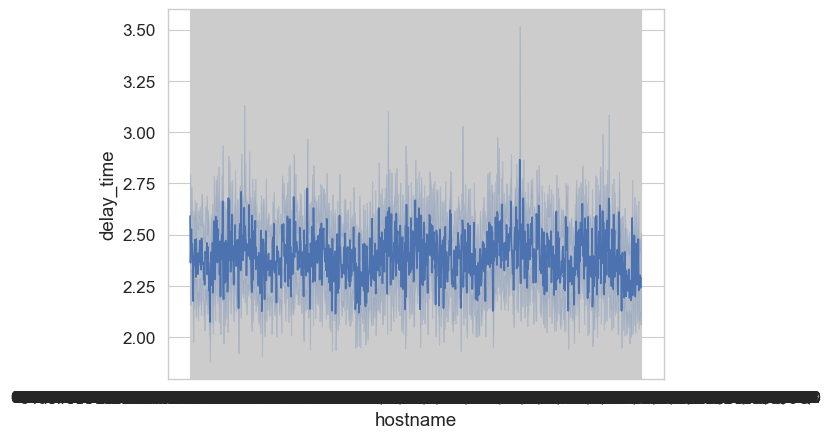

In [254]:
sns.lineplot (x='hostname',y = "delay_time",data = app_host_fil_nonull)
plt.show()

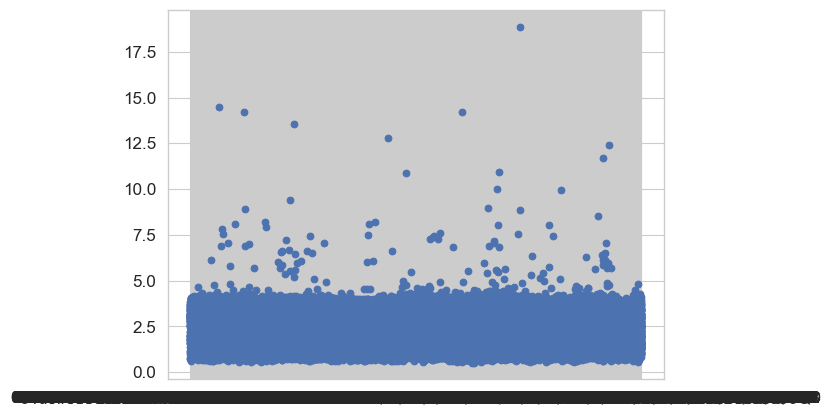

In [259]:
plt.scatter (x='hostname',y = "delay_time",data = app_host_fil_nonull)
